<a href="https://colab.research.google.com/github/MichaelNovandoNapitupulu/Data-Mining/blob/main/Tugas_7_DataMining_DatasetBaru_Michael_Novando_Napitupulu_A11_2022_14452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image, display
import pydotplus

In [14]:
# Load dataset
file_path = 'Student.csv'
data = pd.read_csv(file_path)

In [15]:
# Check for missing values
if data.isnull().sum().any():
    print("Dataset contains missing values. Filling missing values with mode.")
    data.fillna(data.mode().iloc[0], inplace=True)

In [16]:
# Encode categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
enc = LabelEncoder()
for col in categorical_columns:
    data[col] = enc.fit_transform(data[col])


In [17]:
# Split into features and target variable
X = data.drop(columns='race/ethnicity')  # Features
y = data['race/ethnicity']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [20]:
# Evaluate the model
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Handle undefined metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.38

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        40
           2       0.38      0.88      0.53        64
           3       0.50      0.12      0.19        51
           4       0.34      0.45      0.39        29

    accuracy                           0.38       200
   macro avg       0.24      0.29      0.22       200
weighted avg       0.30      0.38      0.27       200


Confusion Matrix:
[[ 0  0 14  1  1]
 [ 0  0 31  1  8]
 [ 0  0 56  2  6]
 [ 0  1 34  6 10]
 [ 0  1 13  2 13]]


In [21]:
# Visualize the decision tree
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True,
    special_characters=True
)

In [22]:
# Convert DOT file to PNG for display
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")

True

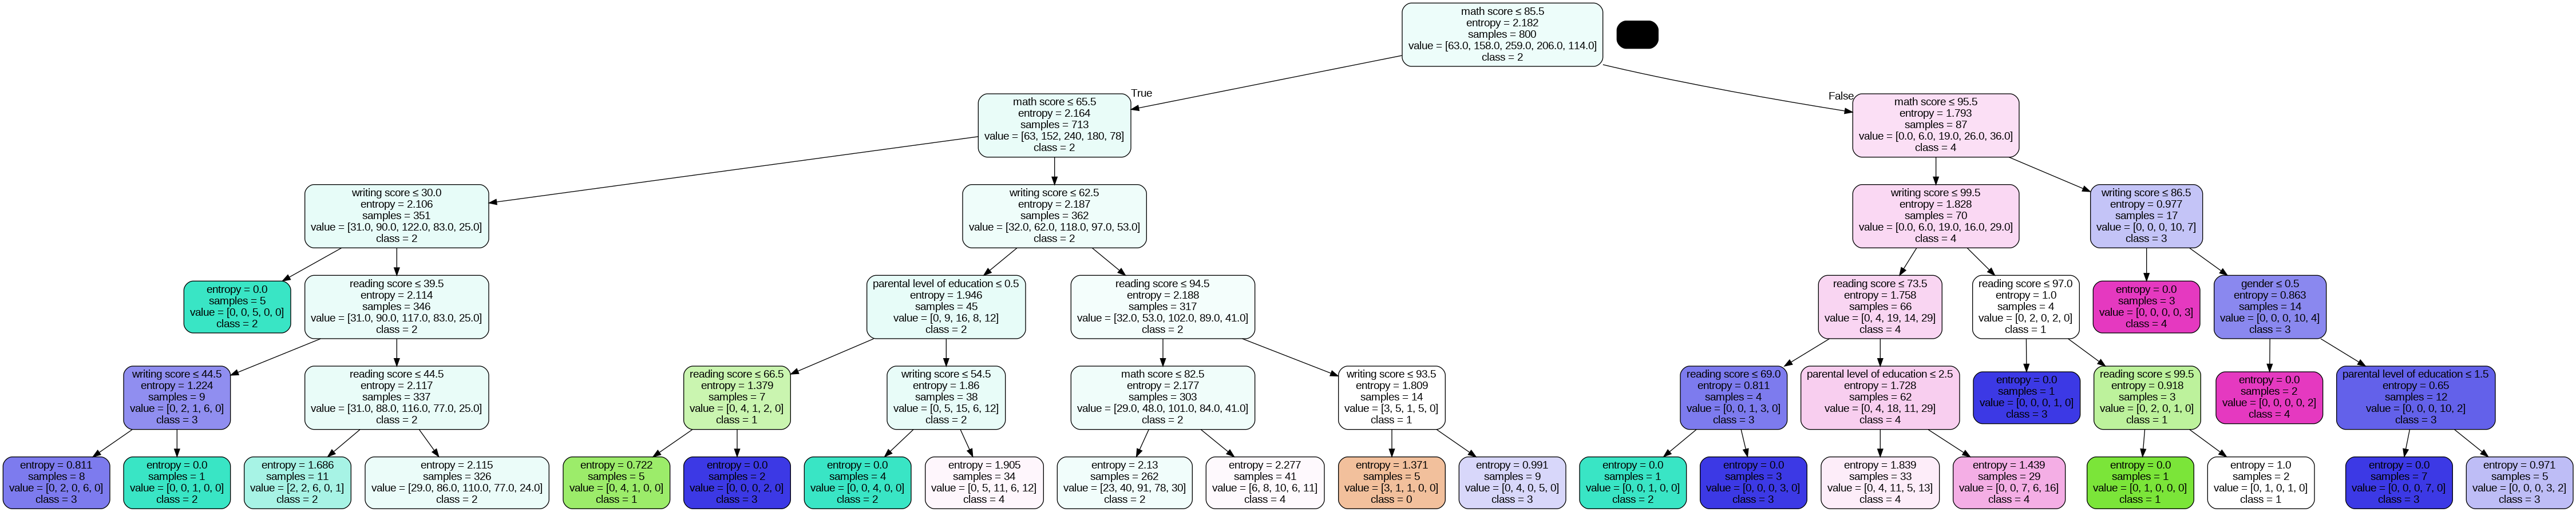

In [23]:
# Display the PNG file
display(Image("decision_tree.png"))